In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
iris_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
iris_df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
y = iris_df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = iris_df.iloc[0:100, [0, 2]].values
y[:10], X[:10]

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3],
        [4.6, 1.5],
        [5. , 1.4],
        [5.4, 1.7],
        [4.6, 1.4],
        [5. , 1.5],
        [4.4, 1.4],
        [4.9, 1.5]]))

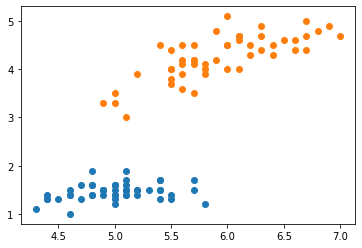

In [12]:
plt.scatter(X[:50, 0], X[:50, 1])
plt.scatter(X[50:, 0], X[50:, 1])
plt.show()

In [21]:
class AdalineGD:

    def __init__(self, eta=0.01, n_iter=100):
        self.eta = eta # learning rate
        self.n_iter = n_iter # iteration count

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0] # x1 * w1 + x2 * w2 + ... xn * wn + w0

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1] + 1) # X의 열 갯수 + 1개의 가중치 배열 만들기
        self.cost = [] # 비용 저장하기 위한 리스트

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w[1:] += self.eta * X.T.dot(errors) # 가중치 조정
            self.w[0] += self.eta * errors.sum()
            cost = (errors**2).sum()
            self.cost.append(cost)

        return self

In [22]:
ada = AdalineGD().fit(X, y)

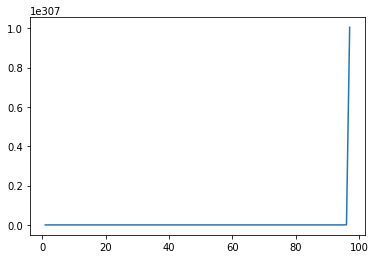

In [23]:
plt.plot(range(1, len(ada.cost) + 1), ada.cost)
plt.show()